## Anique Carey 
## Intro to Machine Learning Final Project
## Churn Prediction

### Imports

In [174]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

## Load Dataset

In [175]:
churn_df=pd.read_csv('Churn_Modelling.csv') 
raw_df = churn_df.copy()

## Overview of Data

In [176]:
churn_df.head() 
churn_df.info() 
churn_df.describe()  
print("total number of rows and columns:", churn_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
total number of rows and columns: (10000, 14)


## Exploratory Data Analysis

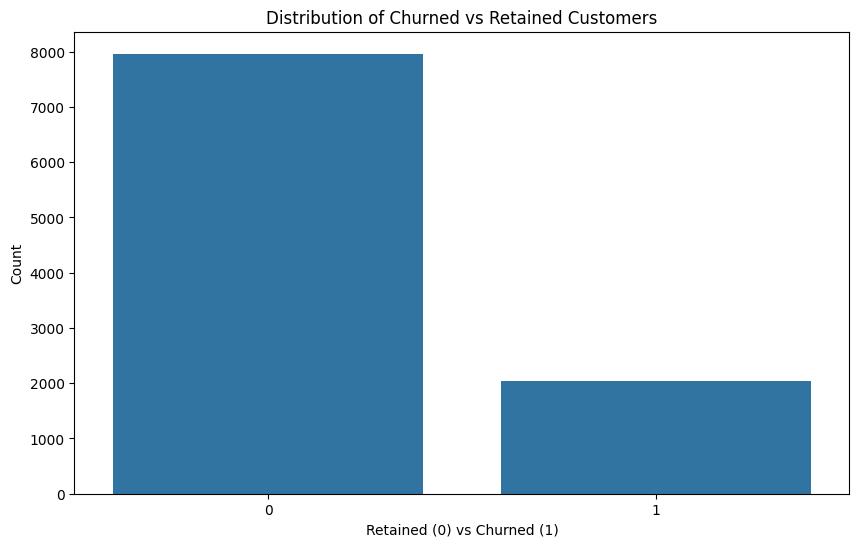

In [177]:
#Exploratory Data Analysis 
plt.figure(figsize=(10,6))
sns.countplot(x='Exited', data=raw_df)
plt.title('Distribution of Churned vs Retained Customers')
plt.xlabel('Retained (0) vs Churned (1)')
plt.ylabel('Count')
plt.show()


## Data Preprocessing

In [178]:
# Data Preprocessing 
raw_df = churn_df.copy()
churn_df = churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)  
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

## K-Nearest Neighbors

KNN Accuracy: 0.83
Confusion Matrix:
 [[1514   93]
 [ 247  146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



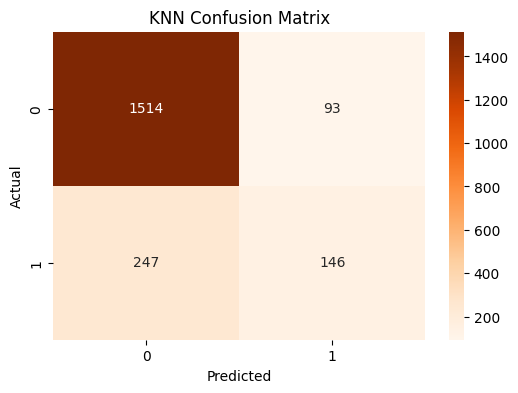

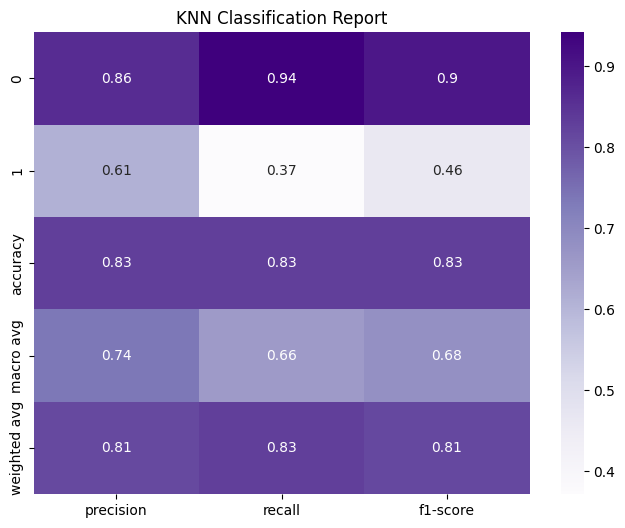

In [179]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)        
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
#confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#classification report plot
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(report_knn).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('KNN Classification Report')  
plt.show()


## Logistic Regression

Logistic Regression Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



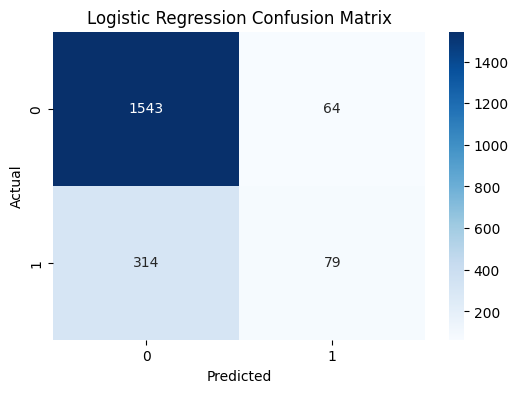

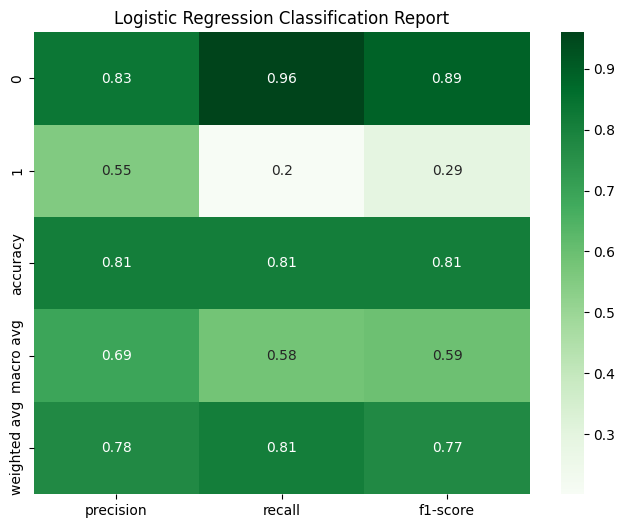

In [180]:
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)     
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg)) 
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

# classification report plot
report = classification_report(y_test, y_pred_logreg, output_dict=True)
plt.figure(figsize=(8,6))       
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Greens')
plt.title('Logistic Regression Classification Report')
plt.show()
 

## Updated Logistic Regression

Updated Logistic Regression Accuracy: 0.7195


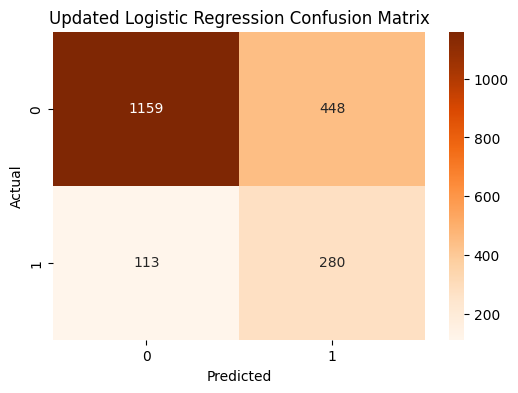

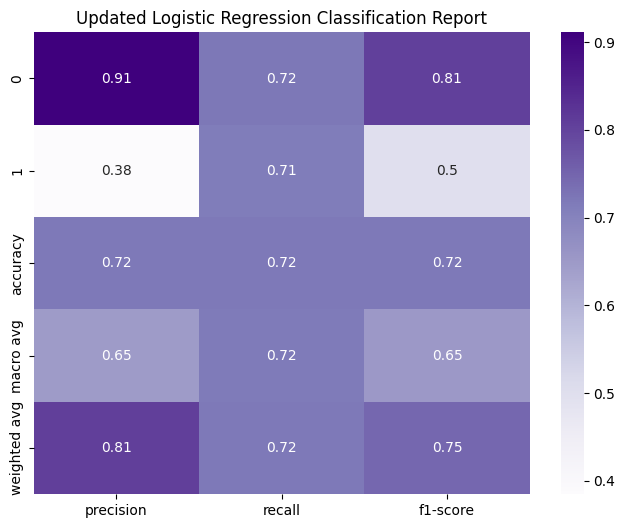

Text(0.5, 1.0, 'Feature Importance from Logistic Regression')

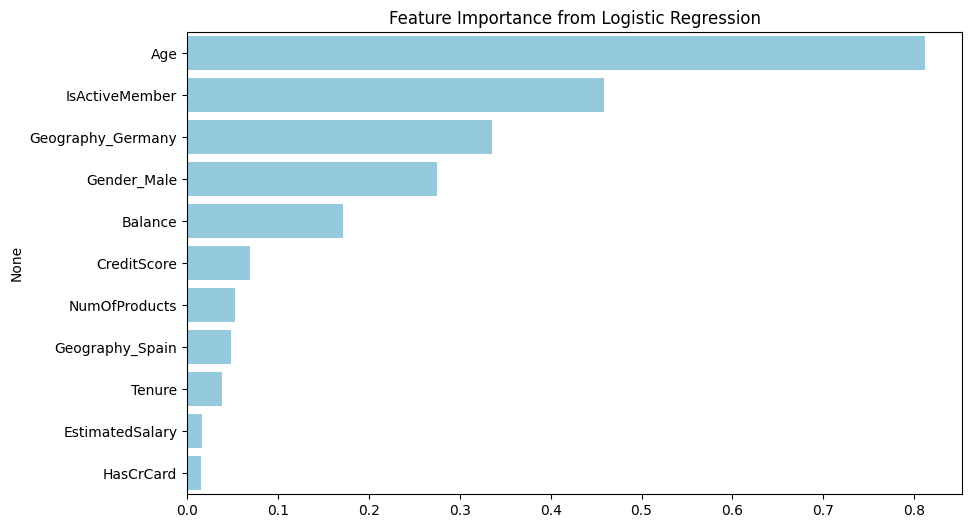

In [181]:
log_reg = LogisticRegression(class_weight='balanced') 
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
print("Updated Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
#confusion matrix plotn 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Oranges')
plt.title('Updated Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#classification report plot
report = classification_report(y_test, y_pred_logreg, output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('Updated Logistic Regression Classification Report')
plt.show()

#feature importance plot
feature_importance = pd.Series(abs(log_reg.coef_[0]), index=churn_df.drop('Exited', axis=1).columns)
feature_importance.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, color='skyblue')
plt.title('Feature Importance from Logistic Regression')    

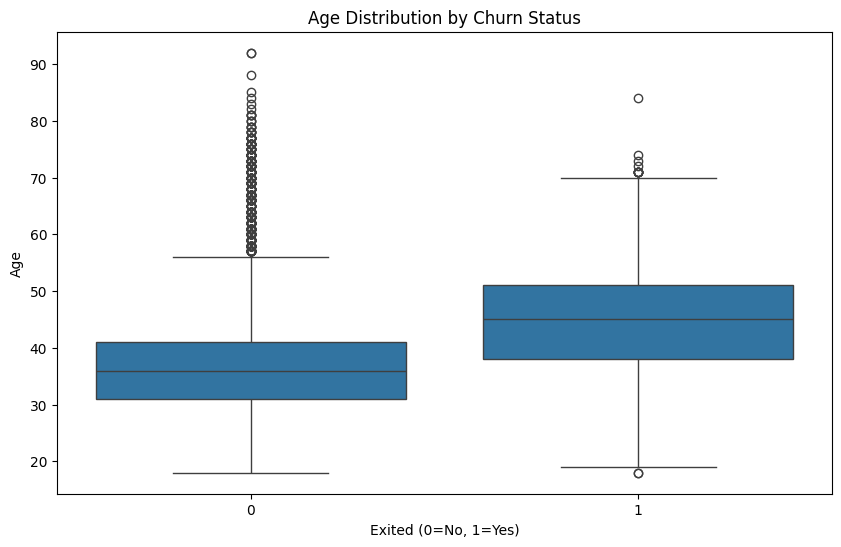

In [182]:
#Ages based on churn status
plt.figure(figsize=(10,6))
sns.boxplot(x='Exited', y='Age', data=churn_df) 
plt.title('Age Distribution by Churn Status')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()


## Churn Based on Gender

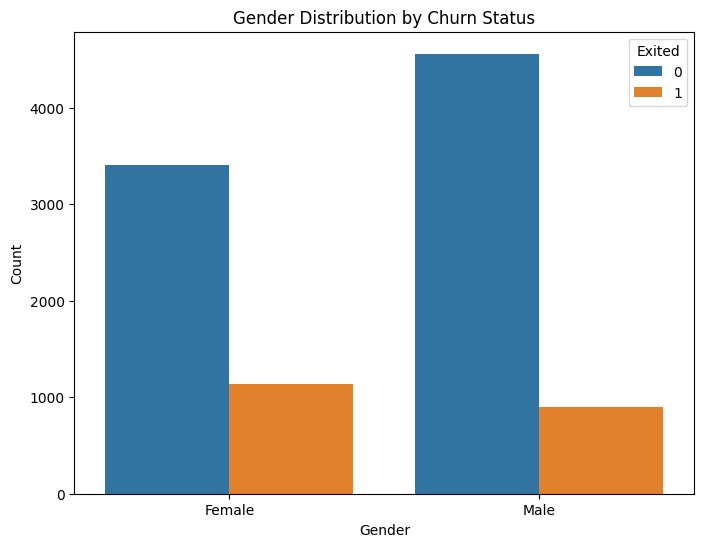

In [183]:
churn_df["Gender_Label"] = churn_df["Gender_Male"].map({False: "Female", True: "Male"})
plt.figure(figsize=(8,6))
sns.countplot(x='Gender_Label', hue='Exited', data=churn_df)
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Churn Based on Geography Germany, Spain, France

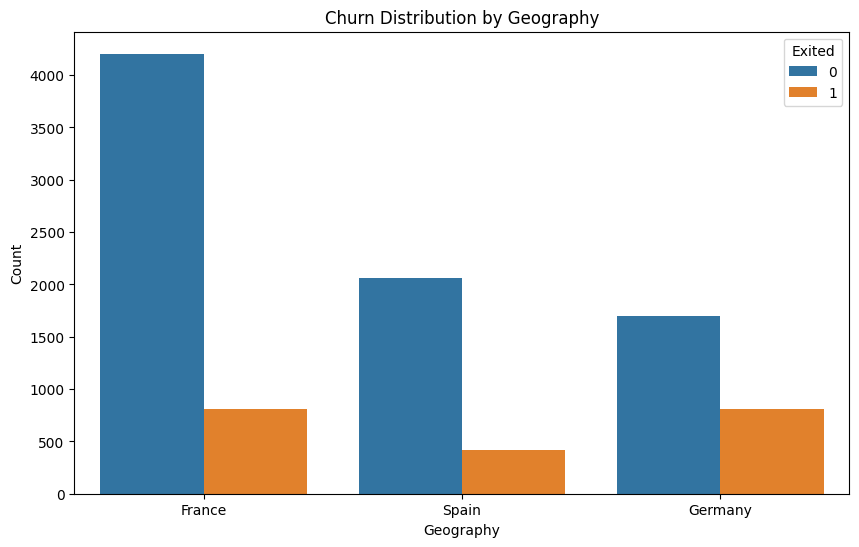

In [184]:
def get_geo(row):
    if row["Geography_Germany"] == True:
        return "Germany"
    elif row["Geography_Spain"] == True:
        return "Spain"
    else:
        return "France"

churn_df["Geography_Label"] = churn_df.apply(get_geo, axis=1) 
plt.figure(figsize=(10,6))
sns.countplot(x='Geography_Label', hue='Exited', data=churn_df)
plt.title('Churn Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

## Churn Based on Member Activity

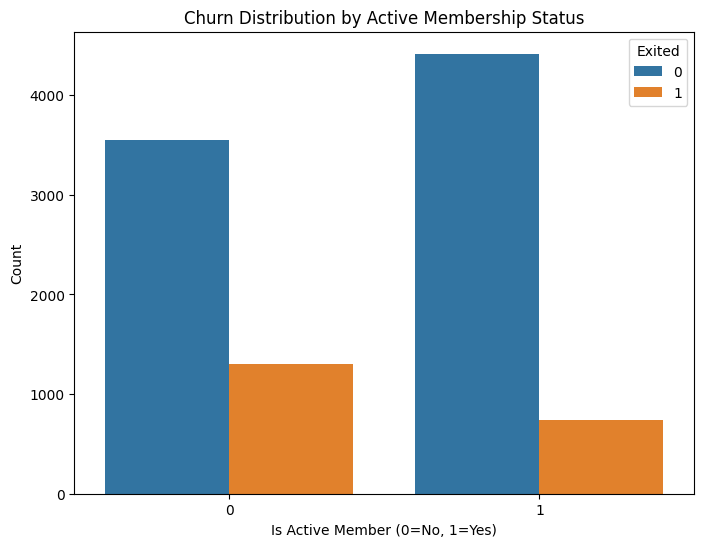

In [185]:
plt.figure(figsize=(8,6))
sns.countplot(x='IsActiveMember', hue='Exited', data=churn_df)
plt.title('Churn Distribution by Active Membership Status')
plt.xlabel('Is Active Member (0=No, 1=Yes)')    
plt.ylabel('Count')
plt.show()